In [1]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
from tensorflow.python.keras.datasets import mnist
from model import VAE

tfe.enable_eager_execution(device_policy=tfe.DEVICE_PLACEMENT_SILENT)



/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
(x_train, y_train), (_, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape((x_train.shape[0], 28 * 28))


In [3]:
ds_train = tf.data.Dataset.from_tensor_slices((x_train,))

In [6]:
model = VAE()
model.load()

INFO:tensorflow:Restoring parameters from checkpoints/-6
load 6


In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
generated_z = np.random.normal(size=(10**2, 128)).astype(np.float32)

logits  = model.decoding(generated_z)



In [11]:
logits[0]

<tf.Tensor: id=259, shape=(784,), dtype=float32, numpy=
array([3.64208539e-08, 7.64819177e-08, 3.66059005e-08, 6.21261336e-08,
       5.76242130e-08, 2.24175771e-08, 5.42810952e-08, 7.78290072e-08,
       4.26210889e-08, 1.83180532e-07, 9.56528297e-08, 9.36045339e-08,
       4.72481112e-08, 1.36536713e-07, 3.06549310e-08, 1.41332151e-07,
       5.44826335e-08, 8.86101503e-08, 1.38593521e-07, 6.98012812e-08,
       6.38718447e-08, 2.88853315e-08, 2.90169186e-08, 2.58451109e-07,
       3.45210687e-08, 1.74359300e-08, 6.22112708e-08, 8.63153033e-08,
       2.66973530e-07, 1.72401933e-08, 1.09946534e-07, 2.29800378e-07,
       5.29470654e-08, 1.39657743e-07, 3.65032662e-08, 8.24964417e-08,
       4.59976199e-08, 1.70920615e-07, 1.07303544e-08, 2.01474109e-08,
       4.85915912e-08, 7.79001468e-08, 1.46387421e-07, 4.48258497e-08,
       9.83471864e-08, 9.92549332e-08, 6.68809577e-08, 8.96437129e-08,
       7.30646548e-08, 3.05962260e-08, 1.06294245e-07, 1.14766543e-07,
       2.32576156e-07

In [12]:
generated_images = logits.numpy().reshape([100, 28, 28, 1]) * 255.0


In [14]:

def square_plot(data):
    """Take an array of shape (n, height, width) or (n, height, width , 3)
       and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)"""

    if type(data) == list:
        data = np.concatenate(data)
    # normalize data for display
    data = (data - data.min()) / (data.max() - data.min())

    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))

    padding = (((0, n ** 2 - data.shape[0]),
                (0, 1), (0, 1))  # add some space between filters
               + ((0, 0),) * (data.ndim - 3))  # don't pad the last dimension (if there is one)
    data = np.pad(data, padding, mode='constant', constant_values=1)  # pad with ones (white)

    # tilethe filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))

    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])

    fig = plt.figure(figsize=(17, 17))
    plt.imshow(data[:, :, 0], cmap='gray')
    plt.axis('off')
    plt.close();

    return fig

In [15]:
fig = square_plot(generated_images)

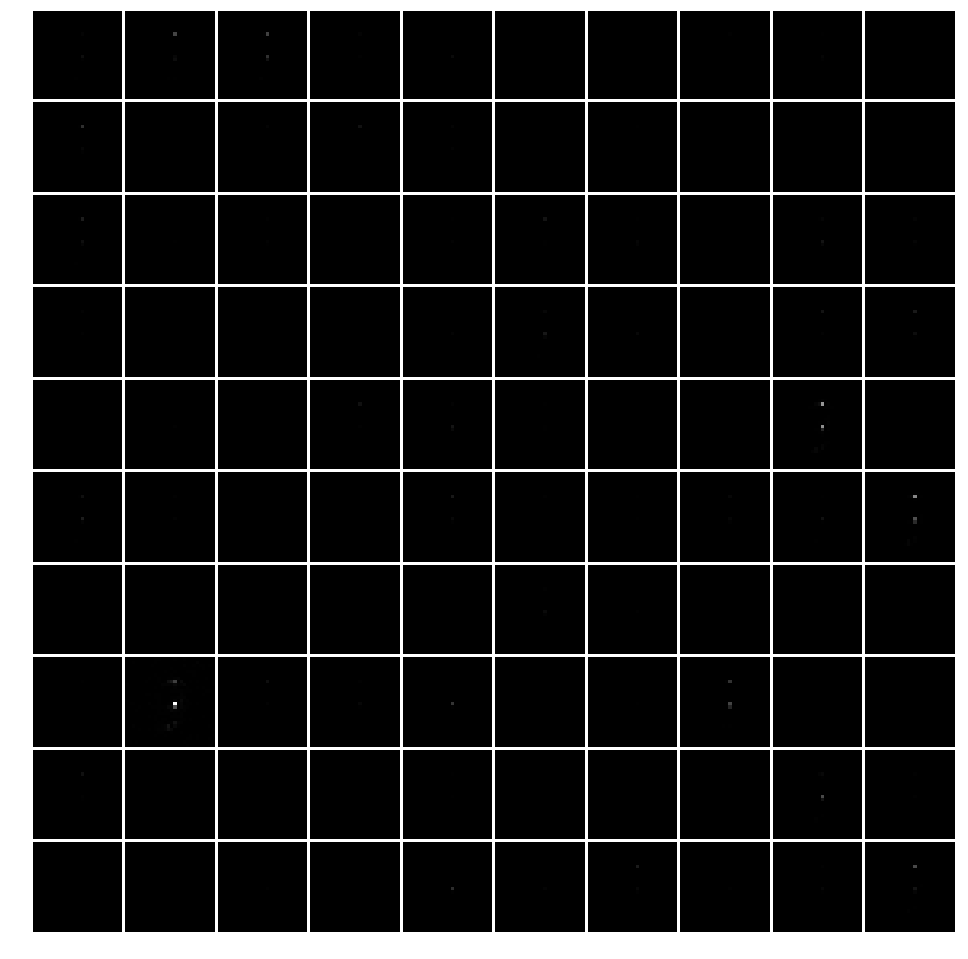

In [16]:
fig